In [53]:
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

import geopandas as gpd
import contextily as ctx
import matplotlib.pyplot as plt

import seaborn as sns

#import geoplot
#import folium

from plotly.offline import init_notebook_mode
init_notebook_mode(connected = True)


ModuleNotFoundError: No module named 'plotly'

In [29]:
import plotly
import plotly.express as px
from IPython.display import HTML #pour afficher les graphs dans une cellule de notebook


ModuleNotFoundError: No module named 'plotly'

In [28]:
jupyter labextension install jupyterlab-plotly


SyntaxError: invalid syntax (<ipython-input-28-923fc71b0f42>, line 1)

In [54]:
!pip install pandas fiona shapely pyproj rtree # à faire obligatoirement en premier pour utiliser rtree ou pygeos pour les jointures spatiales
!pip install contextily
!pip install geopandas
!pip install geoplot

  Using cached geoplot-0.4.4-py3-none-any.whl (29 kB)
  Using cached mapclassify-2.4.3-py3-none-any.whl (38 kB)


  Using cached Cartopy-0.20.1.tar.gz (10.8 MB)
  Installing build dependencies ... done
  Getting requirements to build wheel ... error
  ERROR: Command errored out with exit status 1:
   command: /Users/claire/opt/anaconda3/bin/python /Users/claire/opt/anaconda3/lib/python3.8/site-packages/pip/_vendor/pep517/_in_process.py get_requires_for_build_wheel /var/folders/ds/6_q_535d6glb02j5ym2j6ly00000gn/T/tmpv7qblywx
       cwd: /private/var/folders/ds/6_q_535d6glb02j5ym2j6ly00000gn/T/pip-install-cvgox_kf/cartopy
  Complete output (3 lines):
  setup.py:117: UserWarning: Unable to determine GEOS version. Ensure you have 3.7.2 or later installed, or installation may fail.
    warnings.warn(
  Proj 8.0.0 must be installed.
  ----------------------------------------
ERROR: Command errored out with exit status 1: /Users/claire/opt/anaconda3/bin/python /Users/claire/opt/anaconda3/lib/python3.8/site-packages/pip/_vendor/pep517/_in_process.py get_requires_for_build_wheel /var/folders/ds/6_q_535d6gl

In [3]:
df = pd.read_csv('lieux-de-tournage-a-paris.csv',sep=";",engine='python')
df.head()

,Identifiant du lieu,Année du tournage,Type de tournage,Titre,Réalisateur,Producteur,Localisation de la scène,Code postal,Date de début,Date de fin,Coordonnée en X,Coordonnée en Y,geo_shape,geo_point_2d
0,2019-173,2019,Long métrage,IBRAHIM,SAMIR GUESMI,WHY NOT PRODUCTIONS,"29 boulevard auguste blanqui, 75013 paris",75013.0,2019-02-22,2019-02-22,2.352559,48.830116,"{""type"": ""Point"", ""coordinates"": [2.3525586756...","48.8301164772,2.3525586756"
1,2019-176,2019,Série TV,Le Bazar de la Charité,Alexandre Laurent,quad fantastico télévisons Le bazar de la Charité,"21 rue gracieuse, 75005 paris",75005.0,2019-03-04,2019-03-04,2.351335,48.842919,"{""type"": ""Point"", ""coordinates"": [2.3513345620...","48.8429193101,2.35133456201"
2,2019-515,2019,Série TV,PLATANE SAISON 3,ERIC JUDOR,4 MECS EN BASKETS,"9 avenue hoche, 75008 paris",75008.0,2019-05-20,2019-05-20,2.303760,48.877212,"{""type"": ""Point"", ""coordinates"": [2.3037596788...","48.8772122978,2.30375967881"
3,2019-522,2019,Série TV,The Eddy,Damien Chazelle,atlantique productions,"28 boulevard jourdan, 75014 paris",75014.0,2019-05-23,2019-05-24,2.334607,48.821424,"{""type"": ""Point"", ""coordinates"": [2.3346071504...","48.8214241259,2.33460715041"
4,2018-819,2018,Série TV,Munch saison 2,frederic Berthe,EXILENE,"rue thomas mann, 75013 paris",75013.0,2018-07-13,2018-07-13,2.378161,48.829173,"{""type"": ""Point"", ""coordinates"": [2.3781606591...","48.8291726829,2.37816065911"


In [4]:
#Nombre de séries/film différents (différents du nombre de lignes!)
print("Nombre de séries/film différents : ",df['Titre'].nunique())

#Nombre de types de tournage
print("Nombre de types de tournage : ",df['Type de tournage'].nunique(), "(Long métrage, Série TV, Série Web, Téléfilm)")

Nombre de séries/film différents :  1055
Nombre de types de tournage :  4 (Long métrage, Série TV, Série Web, Téléfilm)


In [5]:
# 'float' to 'String' type (Code postal)
df['Code postal'] = df['Code postal'].astype(str)
df[df['Code postal'].str.startswith("75")]

,Identifiant du lieu,Année du tournage,Type de tournage,Titre,Réalisateur,Producteur,Localisation de la scène,Code postal,Date de début,Date de fin,Coordonnée en X,Coordonnée en Y,geo_shape,geo_point_2d
0,2019-173,2019,Long métrage,IBRAHIM,SAMIR GUESMI,WHY NOT PRODUCTIONS,"29 boulevard auguste blanqui, 75013 paris",75013.0,2019-02-22,2019-02-22,2.352559,48.830116,"{""type"": ""Point"", ""coordinates"": [2.3525586756...","48.8301164772,2.3525586756"
1,2019-176,2019,Série TV,Le Bazar de la Charité,Alexandre Laurent,quad fantastico télévisons Le bazar de la Charité,"21 rue gracieuse, 75005 paris",75005.0,2019-03-04,2019-03-04,2.351335,48.842919,"{""type"": ""Point"", ""coordinates"": [2.3513345620...","48.8429193101,2.35133456201"
2,2019-515,2019,Série TV,PLATANE SAISON 3,ERIC JUDOR,4 MECS EN BASKETS,"9 avenue hoche, 75008 paris",75008.0,2019-05-20,2019-05-20,2.303760,48.877212,"{""type"": ""Point"", ""coordinates"": [2.3037596788...","48.8772122978,2.30375967881"
3,2019-522,2019,Série TV,The Eddy,Damien Chazelle,atlantique productions,"28 boulevard jourdan, 75014 paris",75014.0,2019-05-23,2019-05-24,2.334607,48.821424,"{""type"": ""Point"", ""coordinates"": [2.3346071504...","48.8214241259,2.33460715041"
4,2018-819,2018,Série TV,Munch saison 2,frederic Berthe,EXILENE,"rue thomas mann, 75013 paris",75013.0,2018-07-13,2018-07-13,2.378161,48.829173,"{""type"": ""Point"", ""coordinates"": [2.3781606591...","48.8291726829,2.37816065911"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8914,2020-809,2020,Long métrage,8 Rue de l'Humanité,Dany BOON,PATHÉ PROD EXÉ,"place de la bastille, 75011 paris",75011.0,2020-11-09,2020-11-11,2.369347,48.853473,"{""type"": ""Point"", ""coordinates"": [2.3693474652...","48.8534728013,2.3693474653"
8915,2020-810,2020,Long métrage,ROBUSTE,CONSTANCE MEYER,DHARAMSALA,"10 rue vergniaud, 75013 paris",75013.0,2020-11-25,2020-11-25,2.345645,48.829516,"{""type"": ""Point"", ""coordinates"": [2.3456453654...","48.8295163483,2.34564536541"
8916,2020-821,2020,Série TV,Arsène Lupin,Hugo GÉLIN,Gaumont production télévision,"58 quai des orfèvres, 75001 paris",75001.0,2020-11-11,2020-11-12,2.341937,48.856408,"{""type"": ""Point"", ""coordinates"": [2.3419369173...","48.8564082738,2.34193691732"
8917,2020-835,2020,Long métrage,MES TRÈS CHERS ENFANTS,ALEXANDRA LECLÈRE,LES FILMS DU 24,"35 avenue du général sarrail, 75016 paris",75016.0,2020-11-13,2020-11-13,2.255583,48.843729,"{""type"": ""Point"", ""coordinates"": [2.2555831575...","48.8437289532,2.25558315755"


In [6]:
df['Code postal'].str[3:5]

0       13
1       05
2       08
3       14
4       13
        ..
8914    11
8915    13
8916    01
8917    16
8918    16
Name: Code postal, Length: 8919, dtype: object

In [7]:
#Nombre de tournages en fonction de l'arrondissement
df['Arrondissement'] = df['Code postal'].str[3:5] #Attention aux départements qui ne commencent pas par 75
df.groupby('Arrondissement')["Code postal"].count() #Attention tournages d'un même film à plusieurs endroits

Arrondissement
        1
00      4
01    497
02    219
03    164
04    497
05    469
06    327
07    472
08    546
09    493
10    558
11    435
12    433
13    465
14    250
15    248
16    788
17    277
18    716
19    603
20    457
Name: Code postal, dtype: int64

In [8]:
plt.figure(figsize = (10,6))
X = df['Coordonnée en X']
Y = df['Coordonnée en Y']


<Figure size 720x432 with 0 Axes>

In [ ]:
#Erreur sur 2 lignes
#Attention : ne lancer qu'une fois sinon ça divise
errors = df.loc[df['Coordonnée en Y']>50].index
df.at[errors[0],'Coordonnée en Y'] = df.at[errors[0],'Coordonnée en Y']/1000
df.at[errors[1],'Coordonnée en Y'] = df.at[errors[1],'Coordonnée en Y']/1000

In [9]:
import requests
import tempfile
import zipfile

url = 'https://www.data.gouv.fr/fr/datasets/r/07b7c9a2-d1e2-4da6-9f20-01a7b72d4b12'
temporary_location = tempfile.gettempdir()

def download_unzip(url, dirname = tempfile.gettempdir(), destname = "borders"):
  myfile = requests.get(url)
  open("{}/{}.zip".format(dirname, destname), 'wb').write(myfile.content)
  with zipfile.ZipFile("{}/{}.zip".format(dirname, destname), 'r') as zip_ref:
      zip_ref.extractall(dirname + '/' + destname)


In [10]:
download_unzip(url)
communes = gpd.read_file(temporary_location + "/borders/communes-20190101.json")


<AxesSubplot:title={'center':'Localisation des différents lieux de tournages'}>

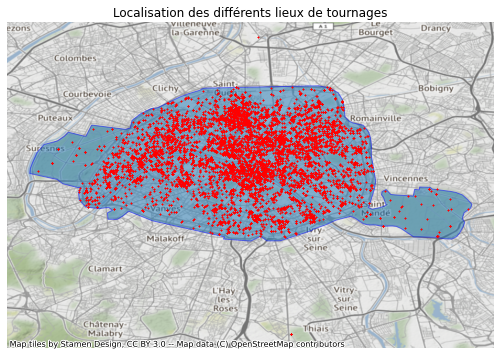

In [11]:
paris = communes[communes.insee.str.startswith("75")]

fig,ax = plt.subplots(figsize=(10, 6))
paris.plot(ax = ax, alpha=0.5, edgecolor='blue')
plt.scatter(X,Y,s=1,c='r',marker='x')
plt.title('Localisation des différents lieux de tournages')
ctx.add_basemap(ax, crs = paris.crs.to_string())
ax.set_axis_off()
ax


<AxesSubplot:title={'center':'Localisation des différents types de tournage'}>

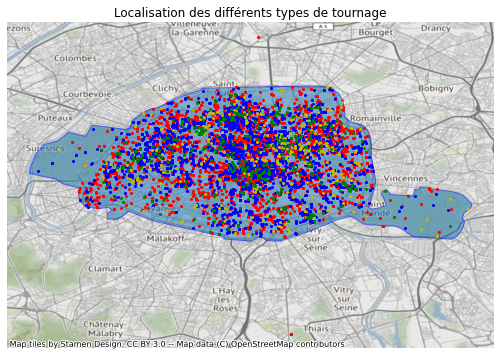

In [12]:
#Séparer localisations des 4 différents types de tournages
long_metrage = df[df['Type de tournage'].str.startswith("Long métrage")]
serie_tv = df[df['Type de tournage'].str.startswith("Série TV")]
serie_web = df[df['Type de tournage'].str.startswith("Série Web")]
telefilm = df[df['Type de tournage'].str.startswith("Téléfilm")]

X_long_metrage = long_metrage['Coordonnée en X']
Y_long_metrage = long_metrage['Coordonnée en Y']

X_serie_tv = serie_tv['Coordonnée en X']
Y_serie_tv = serie_tv['Coordonnée en Y']

X_serie_web = serie_web['Coordonnée en X']
Y_serie_web = serie_web['Coordonnée en Y']

X_telefilm = telefilm['Coordonnée en X']
Y_telefilm = telefilm['Coordonnée en Y']

fig,ax = plt.subplots(figsize=(10, 6))
paris.plot(ax = ax, alpha=0.5, edgecolor='blue')
plt.scatter(X_long_metrage,Y_long_metrage,s=4,c='r',marker='o',label='Long métrage')
plt.scatter(X_serie_tv,Y_serie_tv,s=4,c='b',marker='o',label='Série TV')
plt.scatter(X_serie_web,Y_serie_web,s=4,c='y',marker='o',label='Série Web')
plt.scatter(X_telefilm,Y_telefilm,s=4,c='g',marker='o',label='Téléfilm')
plt.title('Localisation des différents types de tournage')
ctx.add_basemap(ax, crs = paris.crs.to_string())
ax.set_axis_off()
ax

In [45]:
#conversion en entier pour plus beau graphique (ne marche pas)
df['Année du tournage'] = df['Année du tournage'].astype(int)
df['Année du tournage'].describe()

count    8919.000000
mean     2017.669358
std         1.415796
min      2016.000000
25%      2016.000000
50%      2018.000000
75%      2019.000000
max      2020.000000
Name: Année du tournage, dtype: float64

In [14]:
#Combien de tournages par année 

df.groupby('Année du tournage')['Identifiant du lieu'].nunique()

Année du tournage
2016    2660
2017    1743
2018    1579
2019    1760
2020    1177
Name: Identifiant du lieu, dtype: int64

(array([2016, 2017, 2018, 2019, 2020]),
 [Text(2015.5, 0, '2015.5'),
  Text(2016.0, 0, '2016.0'),
  Text(2016.5, 0, '2016.5'),
  Text(2017.0, 0, '2017.0'),
  Text(2017.5, 0, '2017.5')])

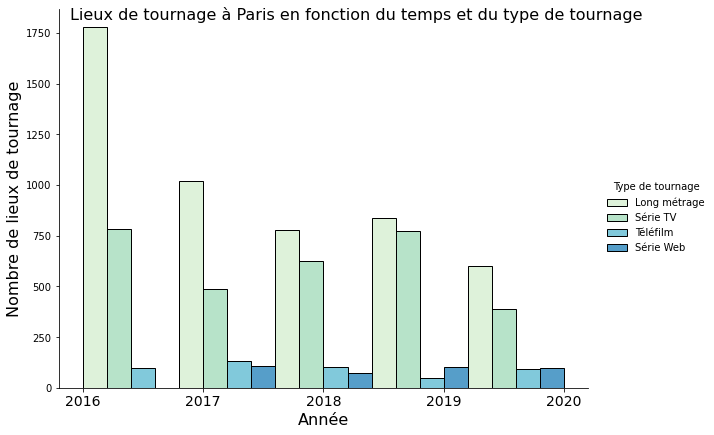

In [51]:
fig = sns.displot(data=df, x='Année du tournage', kind='hist',height=6, aspect=1.4,bins=5,hue='Type de tournage',multiple='dodge', palette='GnBu')
fig.fig.suptitle("Lieux de tournage à Paris en fonction du temps et du type de tournage", fontsize = 16)

plt.xlabel('Année', fontsize=16)
plt.ylabel('Nombre de lieux de tournage', fontsize=16)
plt.xticks(np.arange(2016, 2021, 1))
plt.xticks(fontsize=14)

In [16]:
#Nombre de valeurs manquantes 
df.isnull().sum()

Identifiant du lieu           0
Année du tournage             0
Type de tournage              0
Titre                         0
Réalisateur                 221
Producteur                   12
Localisation de la scène      0
Code postal                   0
Date de début                 0
Date de fin                   0
Coordonnée en X               0
Coordonnée en Y               0
geo_shape                     0
geo_point_2d                  0
Arrondissement                0
dtype: int64

In [17]:
#Le producteur ayant tourné dans le plus de lieux et le nombre de lieux 
g=0
for i in df['Producteur']:
    if df['Identifiant du lieu'][df['Producteur']==i].count()>g:
        g=df['Identifiant du lieu'][df['Producteur']==i].count()
        j=i
print(j)
print(g)

FIRSTEP
188


In [18]:
#Le réalisateur ayant tourné dans le plus de lieux et le nombre de lieux 
g=0
for i in df['Réalisateur']:
    if df['Identifiant du lieu'][df['Réalisateur']==i].count()>g:
        g=df['Identifiant du lieu'][df['Réalisateur']==i].count()
        j=i
print(j)
print(g)

ADITYA CHOPRA
129
